In [5]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys

sys.path.append('../')
from ScHyd import dense_plasma

# Calculate IPD

Text(0.5, 1.0, 'Zbar')

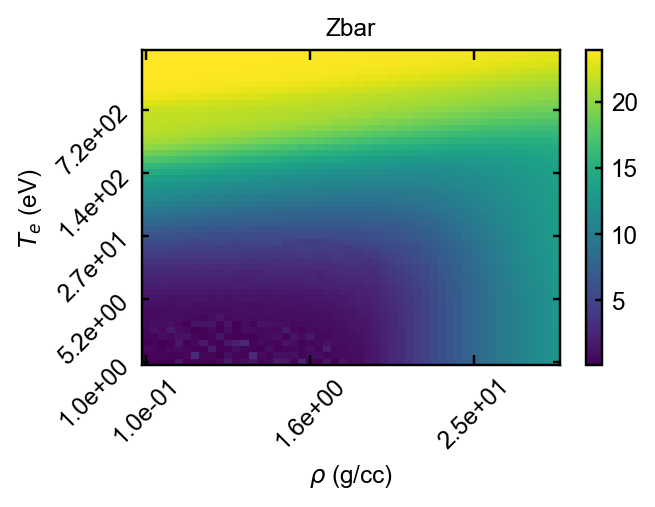

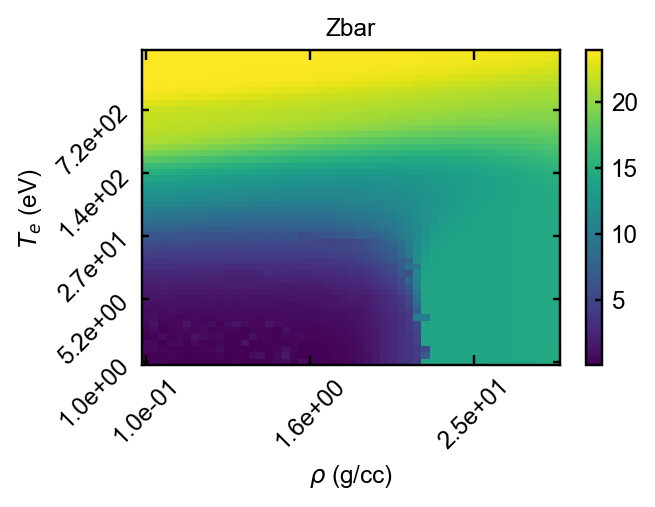

In [6]:
elmnt = 'cr'

# Calculate grids for SP and EK
iter_scheme = '123' # Loop 1=gPQ, 2=PQWE, and/or 3=Z*
Z, Zbar, A = 24,1,51.996

nnn = 50
Ts = np.logspace(0,3.5, num=nnn)
rhos = np.logspace(-1,2, num=nnn+1)

SP = dense_plasma(Z, Zbar, A, Ts, rhos, CL='IS Hansen',
                    iter_scheme=iter_scheme, step=[0.5,0.5,0.5])
plt.title('Zbar')

EK = dense_plasma(Z, Zbar, A, Ts, rhos, CL='EK Hansen',
                    iter_scheme=iter_scheme, step=[0.5,0.5,0.5])
plt.title('Zbar')


# Calculate transition energies

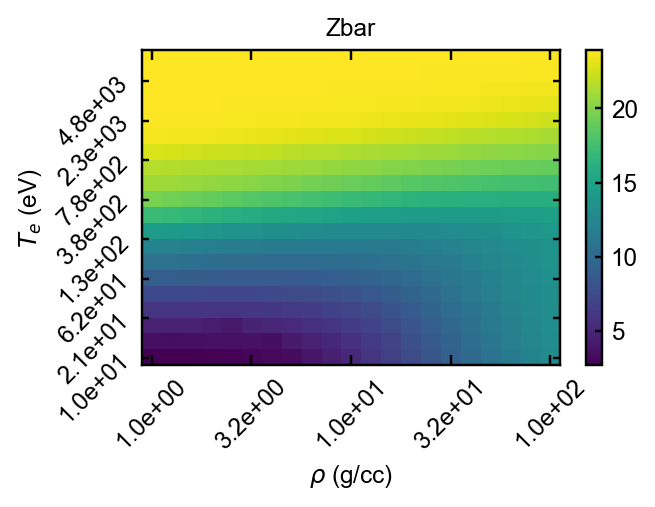

In [7]:
# Evaluate over (slightly) narrower T,rho grid
# Evaluate model over limited T,rho grid
iter_scheme = '123' # Loop 1=gPQ, 2=PQWE, and/or 3=Z*
Z, Zbar, A = 24,1,51.996
# Z, Zbar, A = 26,1,55.845
Ts = np.logspace(1,4, num=20)
rhos = np.logspace(0,2, num=21)
grids = dense_plasma(Z, Zbar, A, Ts, rhos,CL='IS Hansen',
                    iter_scheme=iter_scheme, step=[0.5,0.5,0.5])
plt.title('Zbar')

Zgrid, Engrid, Pngrid, Rngrid, Wngrid, Qngrid, CLgrid = grids

/Users/dbis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Warning: converting a masked element to nan.
/Users/dbis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Warning: converting a masked element to nan.
/Users/dbis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Warning: converting a masked element to nan.
/Users/dbis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Warning: converting a masked element to nan.


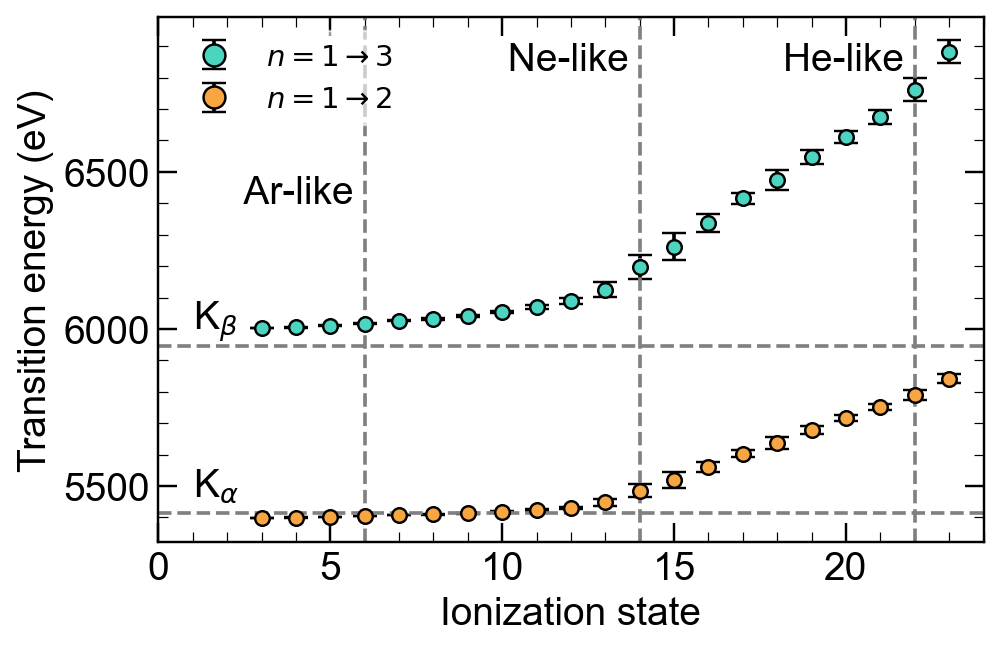

In [8]:
FS = 16
TS = 8
rc_dict = {'font.size': FS,
            'xtick.labelsize' : FS,
            'ytick.labelsize' : FS,
            'axes.titlesize' : FS,
           'axes.labelsize' : FS,
           'legend.fontsize' : FS-4,
           'xtick.major.size' : TS,
           'xtick.minor.size' : TS/2,
           'ytick.major.size' : TS,
           'ytick.minor.size' : TS/2,
            }
mpl.rcParams.update(rc_dict)

# Scatter plot of all
plt.figure(figsize=[6,4])
# plt.scatter(Zgrid.flatten(), (Engrid[1] - Engrid[0]).flatten(), )
plt.gca().set(xlabel=r'Ionization state',
              ylabel='Transition energy (eV)',
              # title='T,rho resolved'
             )

# Average hnu within each Zbar bin
edges = np.arange(Z+1)-0.5
Zs = Zgrid.flatten()

## Plot 1 - 3
hnu = (Engrid[2] - Engrid[0]).flatten()
hnubar = np.array([np.ma.masked_array(hnu, mask=1-(Zs>edges[i])*(Zs<edges[i+1])).mean() for i in range(Z)])
hnustd = np.array([np.ma.masked_array(hnu, mask=1-(Zs>edges[i])*(Zs<edges[i+1])).std() for i in range(Z)])
plt.errorbar(np.arange(Z), hnubar, yerr=hnustd, fmt='.', color='C5', markeredgecolor='k',
             ecolor='k',
             markersize=12,
            capsize=5)

## Plot 1 - 2
hnu = (Engrid[1] - Engrid[0]).flatten()
# hnu = (Engrid[2] - Engrid[1]).flatten()
hnubar = np.array([np.ma.masked_array(hnu, mask=1-(Zs>edges[i])*(Zs<edges[i+1])).mean() for i in range(Z)])
hnustd = np.array([np.ma.masked_array(hnu, mask=1-(Zs>edges[i])*(Zs<edges[i+1])).std() for i in range(Z)])
plt.errorbar(np.arange(Z), hnubar, yerr=hnustd, fmt='.', color='C2', markeredgecolor='k',
             ecolor='k',
             markersize=12,
            capsize=5)

## Plot n = 1 energy
# hnu = abs(Engrid[0]).flatten()
# hnubar = np.array([np.ma.masked_array(hnu, mask=1-(Zs>edges[i])*(Zs<edges[i+1])).mean() for i in range(Z)])
# hnustd = np.array([np.ma.masked_array(hnu, mask=1-(Zs>edges[i])*(Zs<edges[i+1])).std() for i in range(Z)])
# plt.errorbar(np.arange(Z), hnubar, yerr=hnustd, fmt='.', color='C6', markeredgecolor='k',
#              ecolor='k',
#              markersize=12,
#             capsize=5)


plt.legend([r'$n=1\rightarrow 3$', r'$n=1\rightarrow 2$', ])

[plt.axvline(item, ls='--', color='grey') for item in [Z-18, Z-10, Z-2]]
[plt.axhline(item, ls='--', color='grey') for item in [5415, 5947]]

plt.annotate('  Ar-like ', [Z-18, 6400], fontsize=FS, **{'horizontalalignment':'right'})
plt.annotate(' Ne-like ', [Z-10, 6825], fontsize=FS, **{'horizontalalignment':'right'})
plt.annotate('He-like ', [Z-2, 6825], fontsize=FS,
             **{'horizontalalignment':'right'})

plt.annotate(r'K$_\beta$', [1, 6000], fontsize=FS)
plt.annotate(r'K$_\alpha$',[1, 5470], fontsize=FS)

plt.gca().set(xlim=[0,Z],
             )
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(4))
plt.gca().yaxis.set_minor_locator(plt.MaxNLocator(20))

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
plt.gca().xaxis.set_minor_locator(plt.MaxNLocator(25))

